# Analysis of Iris Data


In [1]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
x_names = iris.feature_names
Y_iris = iris.target
y_name = iris.target_names


In [2]:
import pandas as pd
iris_df = pd.DataFrame(X_iris, columns = x_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


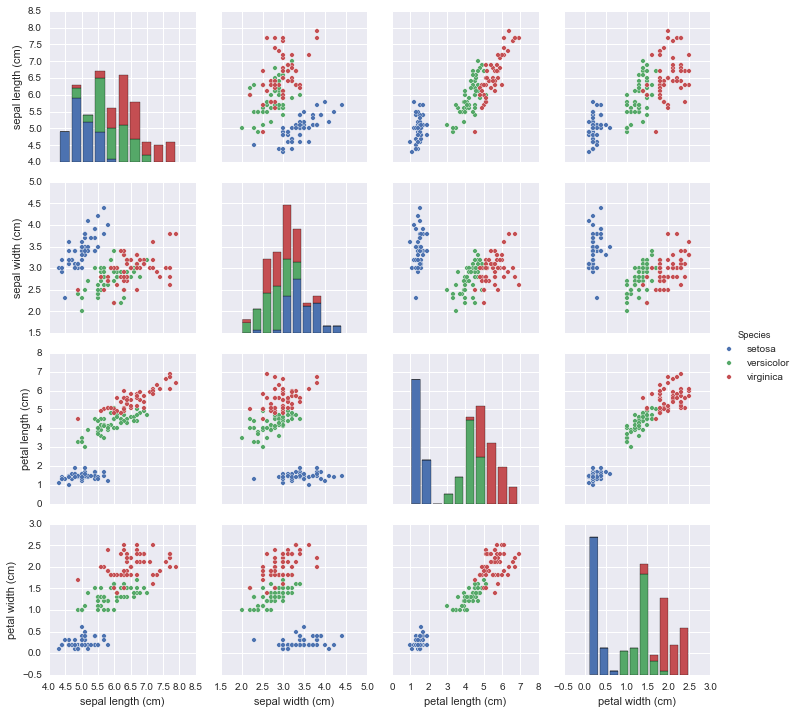

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
iris_df['Species'] = Y_iris
iris_df['Species'] = iris_df['Species'].replace([0,1,2], y_name)
iris_df.head()
sns.pairplot(iris_df, vars = x_names, hue = 'Species')
plt.show()

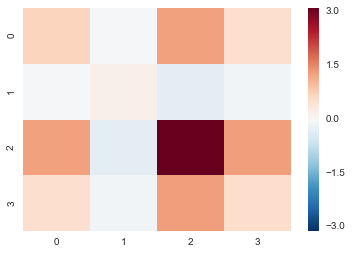

In [33]:
import numpy as np
cov_matrix = np.cov(X_iris.T)
sns.heatmap(cov_matrix)
plt.show()

From the pairplot and covariance matrix, we may tell that petal length are correlated with petal width and sepal length. Petal length may be an important factor for predicting the response.




# KMeans Clustering Algorithm

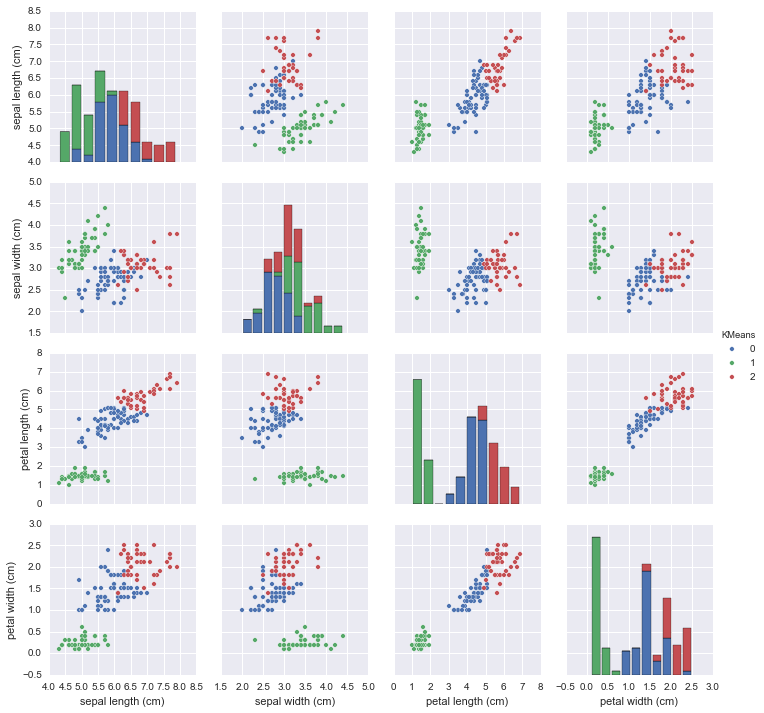

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_iris)
labels = model.predict(X_iris)
iris_df['KMeans'] = labels
sns.pairplot(iris_df, vars = x_names, hue = 'KMeans')
plt.show()

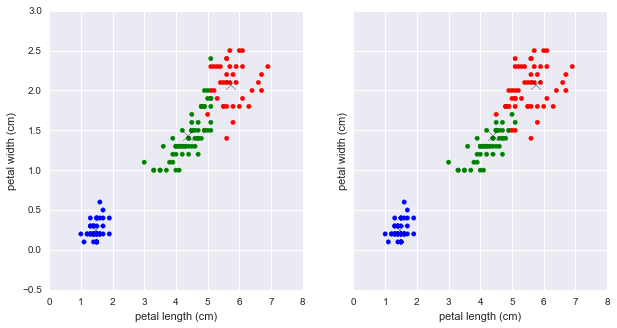

In [26]:
centroids = model.cluster_centers_
kc = {0:'green', 1:'blue', 2:'red'}
sc = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (10, 5))
ax1.scatter(x = x_names[2], y = x_names[3], data = iris_df, color = iris_df['KMeans'].apply(lambda x: kc[x]))
ax1.scatter(centroids[:, 2], centroids[:, 3], marker='x', s=100, c = 'k')
ax1.set_xlabel(x_names[2])
ax1.set_ylabel(x_names[3])
ax2.scatter(x = x_names[2], y = x_names[3], data = iris_df, color = iris_df['Species'].apply(lambda x: sc[x]))
ax2.scatter(centroids[:, 2], centroids[:, 3], marker='x', s=100, c = 'k')
plt.xlabel(x_names[2])
plt.ylabel(x_names[3])
plt.show()

In [72]:
ct = pd.crosstab(iris_df['Species'], iris_df['KMeans'])
print ct

KMeans       0   1   2
Species               
setosa       0  50   0
versicolor  48   0   2
virginica   14   0  36


In [73]:
from __future__ import division
error_rate = 1 - sum(ct.max(axis = 1)) / iris_df.shape[0]
print 'The error rate of KMeans method on iris data is %0.2f%%.' % error_rate

The error rate of KMeans method on iris data is 0.11%.


# Principal Component Analysis (PCA)


We have seen that the predictors are correlated, thus we may perform PCA for dimension reduction.

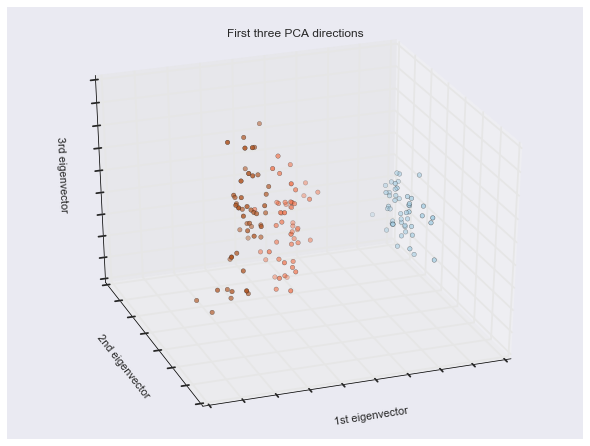

In [86]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_pca3 = PCA(n_components=3).fit_transform(X_iris)
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=Y_iris,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [64]:

from scipy.stats import pearsonr
pca = PCA(n_components=2)
X_pca = pca.fit(X_iris).transform(X_iris)
print 'The means are:'
print(pca.mean_)
print 'The two components are:'
print(pca.components_) 
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
correlation, pvalue = pearsonr(X_pca[:,0], X_pca[:,1])
print 'The correlation between the new X set is %0.2f. Therefore, PCA uncorrelates the data' % correlation


The means are:
[ 5.84333333  3.054       3.75866667  1.19866667]
The two components are:
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]
Explained variance ratio (first two components): [ 0.92461621  0.05301557]
The correlation between the new X set is 0.00. Therefore, PCA uncorrelates the data


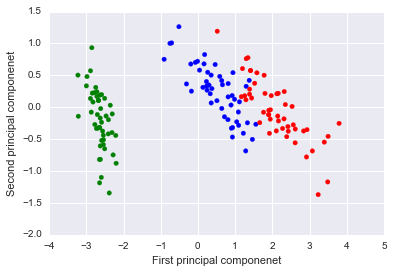

In [65]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], color = [kc[i] for i in Y_iris])
plt.xlabel('First principal componenet')
plt.ylabel('Second principal componenet')
plt.show()

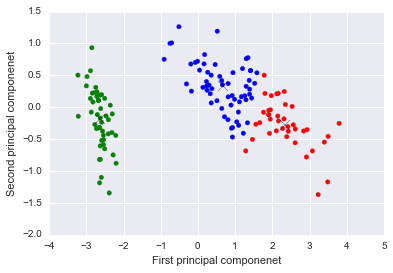

In [68]:
model_pca = KMeans(n_clusters=3)
model_pca.fit(X_pca)
labels_pca = model_pca.predict(X_pca)
centroids_pca = model_pca.cluster_centers_
plt.scatter(X_pca[:, 0], X_pca[:, 1], color = [kc[i] for i in labels_pca])
plt.scatter(centroids_pca[:, 0], centroids_pca[:,1], marker='x', s=100, c= 'k')
plt.xlabel('First principal componenet')
plt.ylabel('Second principal componenet')
plt.show()


In [74]:
ct_pca = pd.crosstab(Y_iris, labels_pca)
print(ct_pca)
error_rate = 1 - sum(ct_pca.max(axis = 1)) / len(Y_iris)
print 'The error rate of KMeans method on iris data is %0.2f%%.' % error_rate

col_0   0   1   2
row_0            
0      50   0   0
1       0  47   3
2       0  14  36
The error rate of KMeans method on iris data is 0.11%.


PCA reduce the dimension from 4 to 2 without increasing too much the error rate of K-means.

# Linear Discriminant Analysis (LDA)


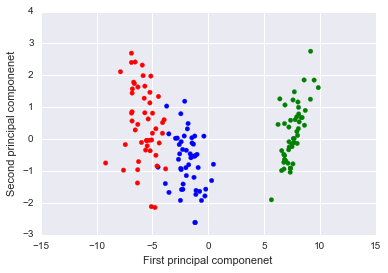

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_iris, Y_iris).transform(X_iris)
plt.scatter(X_lda[:, 0], X_lda[:, 1], color = [kc[i] for i in Y_iris])
plt.xlabel('First principal componenet')
plt.ylabel('Second principal componenet')
plt.show()

In [82]:
print 'The means are:'
print(lda.means_)
print 'Coefficients for [Classes, features] are:'
print(lda.coef_) 
#print('Explained variance ratio (first two components): %s' % str(lda.explained_variance_ratio_ ))
correlation, pvalue = pearsonr(X_lda[:,0], X_lda[:,1])
print 'The correlation between the new X set is %0.2f.' % correlation

The means are:
[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]
Coefficients for [Classes, features] are:
[[  6.24621637  12.24610757 -16.83743427 -21.13723331]
 [ -1.51666857  -4.36791652   4.64982565   3.18640594]
 [ -4.72954779  -7.87819105  12.18760862  17.95082737]]
The correlation between the new X set is -0.00.
